In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import combinations
from sklearn.decomposition import PCA
from typing import List, Tuple
from tqdm.auto import tqdm
import seaborn as sns

In [7]:
df_data = pd.read_csv('../data/Materials_responses.csv', index_col=0)

In [156]:
df_data = df_data.reset_index() 
df_data = df_data.rename({"index": "material_no"}, axis=1)

if "Unnamed: 7" in df_data.columns:
    df_data = df_data.rename({"Unnamed: 7": "meaning"}, axis=1)
    df_data = df_data.drop(df_data[df_data.meaning == "strange"].index)


In [157]:
df_data

material_no                       Materials   Acetone   Benzene  Methanol   
0             0                     CoOx-100k-p  0.026327  0.012519  0.036408  \
1             1                   NiO #1-100k-p  0.198216  0.067103  0.217657   
2             2                   NiO #2-100k-p  0.060299  0.025800  0.087869   
3             3                   NiO #3-100k-p  0.012864  0.007017  0.033572   
4             4             NiO #4-100k-N/B/I-p  0.028986  0.015680  0.068497   
5             5  (CeO2)0.8(Sm2O3)0.2-1M-N-p-D/B  0.144756  0.076946  0.183903   
6             6                 NiO #5-1M-N/B-p  0.200369  0.022174  0.278004   
7             7           NiCo2O4 #1-1M-N-p-D/B  0.155551  0.000000  0.034960   
8             8           V2O5-50% WO₃-1M-N/B-n  0.104182  0.103516  0.124410   
9             9                  5.0 AZO-1M-N-n  0.172129  0.083895  0.019027   
10           10                    2.5 AZO-1M-n  0.302609  0.223357  0.090051   
11           11                     V2O5-100k-n  0.016662  0.053179  0.007171   
12           12              V2O5-10% WO3-10k-n  0.026027  0.043325  0.001676   
13           13               V2O5-5% WO3-10k-n  0.023288  0.030747  0.007670   
14           14                 ZZO #3.8-1M-N-n  0.116304  0.092793  0.176615   
15           15                     AZO #7-1M-n  0.092440  0.025612  0.057678   
16           16                   ITO #4.3-1M-n  0.168714  0.060004  0.216719   
17           17                   AZO #6-1M-N-n  0.039615  0.020748  0.055295   
18           18                 GZO #2.1-1M-N-n  0.034723  0.018231  0.042218   
19           19                     AZO #1-1M-n  0.045783  0.032193  0.059366   

     Ethanol       IPA  
0   0.018916  0.015718  
1   0.122994  0.075274  
2   0.041691  0.026041  
3   0.008616  0.004353  
4   0.016875  0.007364  
5   0.078049  0.000697  
6   0.154506  0.226892  
7   0.160835  0.216128  
8   0.087419  0.055327  
9   0.013847  0.041146  
10  0.088518  0.096605  
11  0.011163  0.005334  
12  0.002589  0.001934  
13  0.009305  0.006091  
14  0.131986  0.167689  
15  0.043440  0.052096  
16  0.131874  0.133911  
17  0.055226  0.060600  
18  0.032763  0.038607  
19  0.050084  0.068417

In [8]:
print(f'Total materials: {len(df_data.Materials.drop_duplicates())}')

Total materials: 20


In [9]:
df_data.Materials.drop_duplicates()

0                        CoOx-100k-p
1                      NiO #1-100k-p
2                      NiO #2-100k-p
3                      NiO #3-100k-p
4                NiO #4-100k-N/B/I-p
5     (CeO2)0.8(Sm2O3)0.2-1M-N-p-D/B
6                    NiO #5-1M-N/B-p
7              NiCo2O4 #1-1M-N-p-D/B
8              V2O5-50% WO₃-1M-N/B-n
9                     5.0 AZO-1M-N-n
10                      2.5 AZO-1M-n
11                       V2O5-100k-n
12                V2O5-10% WO3-10k-n
13                 V2O5-5% WO3-10k-n
14                   ZZO #3.8-1M-N-n
15                       AZO #7-1M-n
16                     ITO #4.3-1M-n
17                     AZO #6-1M-N-n
18                   GZO #2.1-1M-N-n
19                       AZO #1-1M-n
Name: Materials, dtype: object

In [10]:
ANALYTES = ["Acetone", "Benzene", "Methanol", "Ethanol", "IPA"]
MATERIALS = df_data.material_no.tolist()

In [11]:
MATERIALS

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [12]:
df_data_T = df_data[ANALYTES].T
df_data_T['Material'] = df_data_T.index
df_data_T

0         1         2         3         4         5   
Acetone   0.026327  0.198216  0.060299  0.012864  0.028986  0.144756  \
Benzene   0.012519  0.067103  0.025800  0.007017  0.015680  0.076946   
Methanol  0.036408  0.217657  0.087869  0.033572  0.068497  0.183903   
Ethanol   0.018916  0.122994  0.041691  0.008616  0.016875  0.078049   
IPA       0.015718  0.075274  0.026041  0.004353  0.007364  0.000697   

                 6         7         8         9  ...        11        12   
Acetone   0.200369  0.155551  0.104182  0.172129  ...  0.016662  0.026027  \
Benzene   0.022174  0.000000  0.103516  0.083895  ...  0.053179  0.043325   
Methanol  0.278004  0.034960  0.124410  0.019027  ...  0.007171  0.001676   
Ethanol   0.154506  0.160835  0.087419  0.013847  ...  0.011163  0.002589   
IPA       0.226892  0.216128  0.055327  0.041146  ...  0.005334  0.001934   

                13        14        15        16        17        18   
Acetone   0.023288  0.116304  0.092440  0.168714  0.039615  0.034723  \
Benzene   0.030747  0.092793  0.025612  0.060004  0.020748  0.018231   
Methanol  0.007670  0.176615  0.057678  0.216719  0.055295  0.042218   
Ethanol   0.009305  0.131986  0.043440  0.131874  0.055226  0.032763   
IPA       0.006091  0.167689  0.052096  0.133911  0.060600  0.038607   

                19  Material  
Acetone   0.045783   Acetone  
Benzene   0.032193   Benzene  
Methanol  0.059366  Methanol  
Ethanol   0.050084   Ethanol  
IPA       0.068417       IPA  

[5 rows x 21 columns]

In [13]:
def _euclidean(a: np.ndarray, b: np.ndarray) -> float:
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2) ** .5

In [14]:
def pca_transform(df_data: pd.DataFrame, materials: List[int]) -> Tuple[np.ndarray, np.ndarray]:
    """Transform data from N space to 2 space"""
    pca = PCA(2)
    df = pca.fit_transform(df_data[materials])
    return df, df_data.Material.reset_index(drop=True)

IDX_ANALYTES = np.array([0, 1, 2, 3, 4])

def pca_estimate(arr: np.ndarray, y: pd.Series = None, only: str = None) -> float:
    """Here we can calculate mean euclidean data (below)
    """
    _dist = []
    result = {}
    
    if only:
        one = y[y == only].index[0]
        a = arr[one]
        others = y[y != only].index
        
        for b in arr[others]:
            _dist.append(_euclidean(a, b))
    else:
        arr = np.insert(arr, 2, IDX_ANALYTES, axis=1)
        for a, b in combinations(arr, 2):
            d = _euclidean(a[:2], b[:2])
            _dist.append(d)  # save to calculate mean and median
            result[f"{a[2].astype(int)} {b[2].astype(int)}"] = d  # save to calculate distribution statistic across all combs in group
    return {
        "median": np.median(_dist),
        "mean": np.mean(_dist),
        **result,
    }


def pca_print(transformed: np.ndarray, y: np.ndarray, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(15, 7))
    ax.scatter(transformed[:,0], transformed[:,1])

In [15]:
tr, y = pca_transform(df_data_T, list([1, 2, 3, 4]))
pca_estimate(tr, y, )

{'median': 0.0992039158967614,
 'mean': 0.0983892434750482,
 '0 1': 0.1363511530154167,
 '0 2': 0.05590872714420313,
 '0 3': 0.07849460055920503,
 '0 4': 0.12970556804138608,
 '1 2': 0.17323120285034702,
 '1 3': 0.05803453509577335,
 '1 4': 0.011597487869978737,
 '2 3': 0.11991323123431778,
 '2 4': 0.16936939785403013,
 '3 4': 0.05128653108582396}

# Across all analytes

In [16]:
min_sensors = 3
max_sensors = 17

result = []
for count in tqdm(range(min_sensors, max_sensors + 1)):
    for sensors in tqdm(combinations(MATERIALS, count), leave=False, desc="materials"):
        tr, _ = pca_transform(df_data_T, list(sensors))
        info = pca_estimate(tr)
        result.append({
            "sensors": sensors,
            **info,
        })

  0%|          | 0/15 [00:00<?, ?it/s]

materials: 0it [00:00, ?it/s]

materials: 0it [00:00, ?it/s]

materials: 0it [00:00, ?it/s]

materials: 0it [00:00, ?it/s]

materials: 0it [00:00, ?it/s]

materials: 0it [00:00, ?it/s]

materials: 0it [00:00, ?it/s]

materials: 0it [00:00, ?it/s]

materials: 0it [00:00, ?it/s]

materials: 0it [00:00, ?it/s]

materials: 0it [00:00, ?it/s]

materials: 0it [00:00, ?it/s]

materials: 0it [00:00, ?it/s]

materials: 0it [00:00, ?it/s]

materials: 0it [00:00, ?it/s]

In [19]:
df_result = pd.DataFrame(result)
df_result["count"] = df_result.sensors.apply(lambda tpl: len(tpl))

Best sensors: (1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19) (15) 0.2795148921366026
Worst sensors: (11, 13, 18) (3) 0.020088257124943477


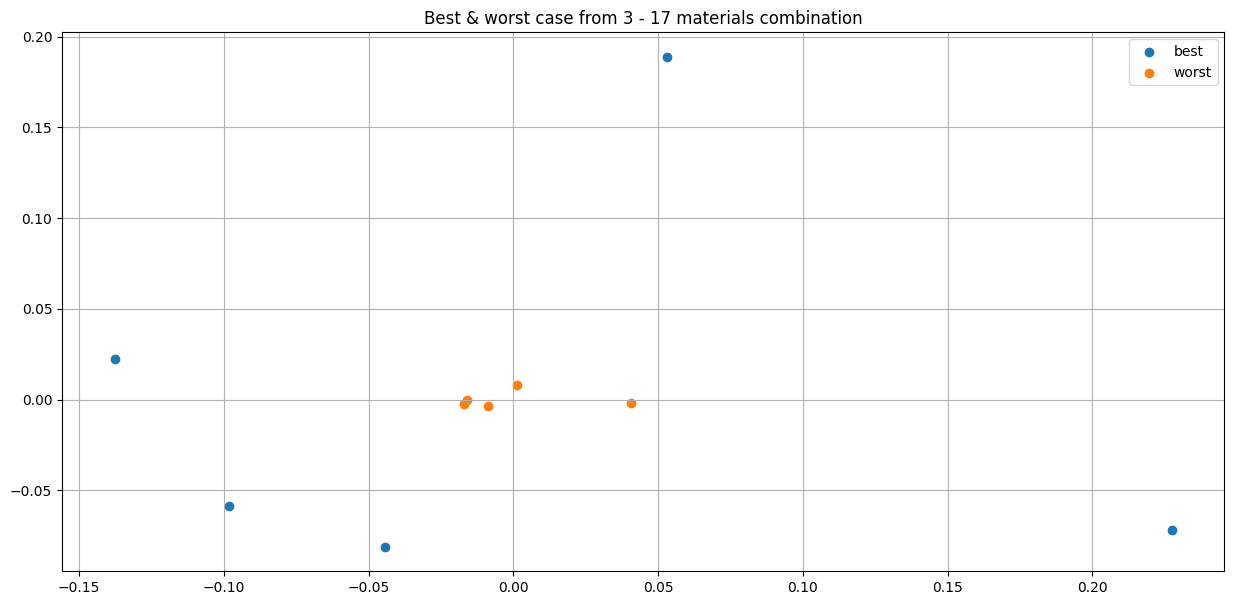

In [21]:
best = df_result.loc[df_result["median"].idxmax()]
worst = df_result.loc[df_result["median"].idxmin()]

fig, ax = plt.subplots(figsize=(15, 7))
tr, y = pca_transform(df_data_T, list(best.sensors))
ax.scatter(tr[:,0], tr[:,1], label="best")
best_data = pd.DataFrame([tr[:,0], tr[:,1]]).T
best_data.columns = ['x', 'y']

tr, y = pca_transform(df_data_T, list(worst.sensors))
ax.scatter(tr[:,0], tr[:,1], label="worst")
worst_data = pd.DataFrame([tr[:,0], tr[:,1]]).T
worst_data.columns = ['x', 'y']

ax.set_title("Best & worst case from 3 - 17 materials combination")
ax.grid()
ax.legend()

print("Best sensors:", best.sensors, f"({len(best.sensors)})", best["median"])
print("Worst sensors:", worst.sensors, f"({len(worst.sensors)})", worst["median"])

In [24]:
df_data['Materials'][list(best.sensors)]

1             NiO #1-100k-p
6           NiO #5-1M-N/B-p
7     NiCo2O4 #1-1M-N-p-D/B
8     V2O5-50% WO₃-1M-N/B-n
9            5.0 AZO-1M-N-n
10             2.5 AZO-1M-n
11              V2O5-100k-n
12       V2O5-10% WO3-10k-n
13        V2O5-5% WO3-10k-n
14          ZZO #3.8-1M-N-n
15              AZO #7-1M-n
16            ITO #4.3-1M-n
17            AZO #6-1M-N-n
18          GZO #2.1-1M-N-n
19              AZO #1-1M-n
Name: Materials, dtype: object

In [25]:
df_data['Materials'][list(worst.sensors)]

11          V2O5-100k-n
13    V2O5-5% WO3-10k-n
18      GZO #2.1-1M-N-n
Name: Materials, dtype: object

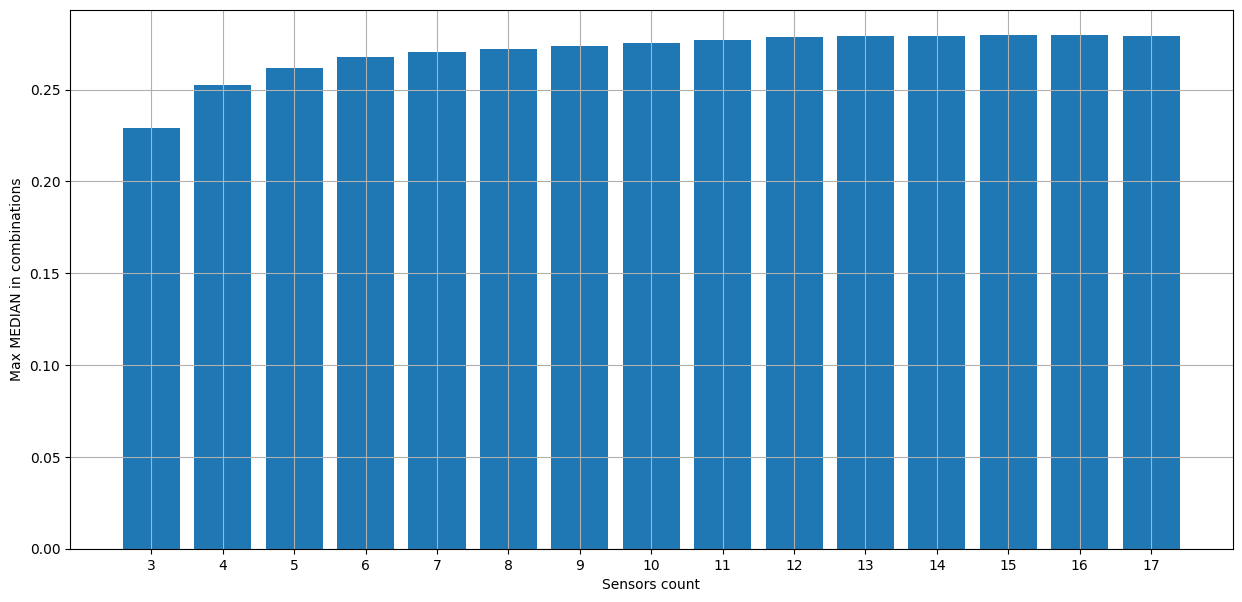

In [158]:
# Median/Combination example

fig, ax = plt.subplots(figsize=(15, 7))

group_max_median = df_result.groupby("count").agg({"median": "max"})
ax.bar(group_max_median.index, height=group_max_median["median"])
ax.set_xticks(range(3, 18))
ax.set_xlabel("Sensors count")
ax.set_ylabel("Max MEDIAN in combinations")
ax.grid()

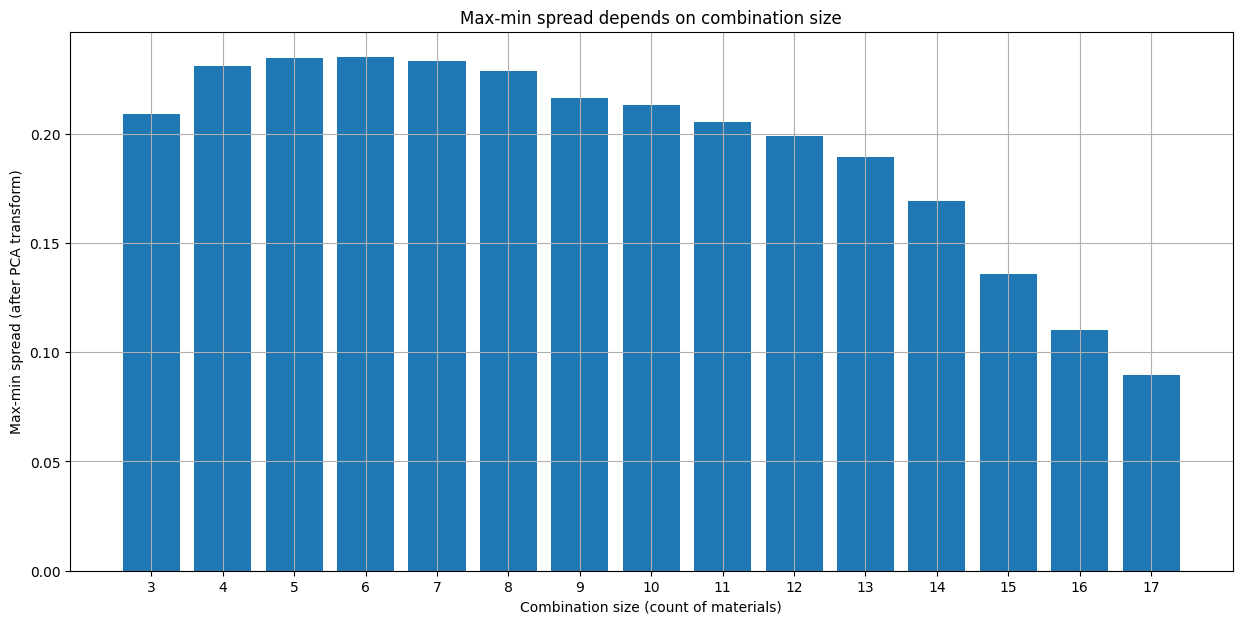

In [32]:
# How worst-best spread changes according to count of materials in group?

materials_cnt = []  # materials on chip
min_max_delta = []  # spread between min & max
for cnt in range(3, 18):
    df = df_result[df_result["count"] == cnt]
    materials_cnt.append(cnt)
    min_max_delta.append(df["median"].max() - df["median"].min())

fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(materials_cnt, min_max_delta)
ax.set_xticks(range(3, 18))
ax.set_title("Max-min spread depends on combination size")
ax.set_ylabel("Max-min spread (after PCA transform)")
ax.set_xlabel("Combination size (count of materials)")
ax.grid()

In [33]:
PAIRS_COLUMNS = ['0 1', '0 2', '0 3', '0 4', '1 2', '1 3', '1 4', '2 3', '2 4', '3 4']

In [34]:
info = []
for c, df in df_result.groupby('count'):
    buf = {
        "c": c,
    }
    for pair in PAIRS_COLUMNS:
        buf[pair] = df[pair].var()
    info.append(buf)

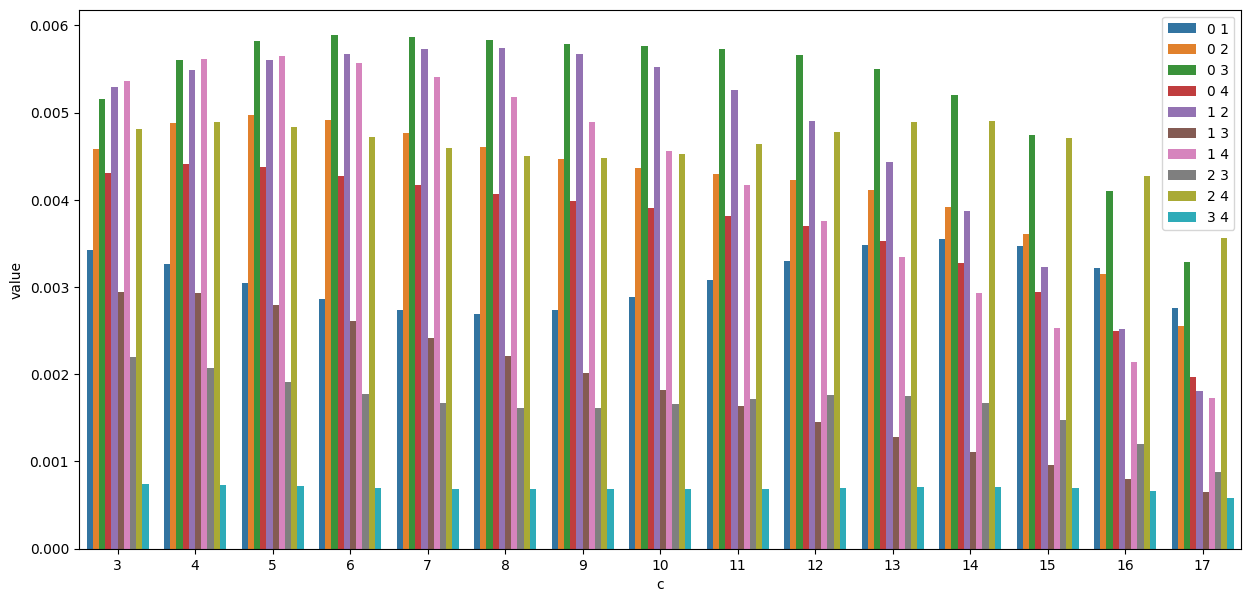

In [35]:
df_info = pd.DataFrame(info)
df_info = df_info.melt(id_vars=['c'], value_vars=PAIRS_COLUMNS)

fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(df_info, y='value', x='c', hue='variable')
ax.legend()

Text(0, 0.5, 'Average variance in combination')

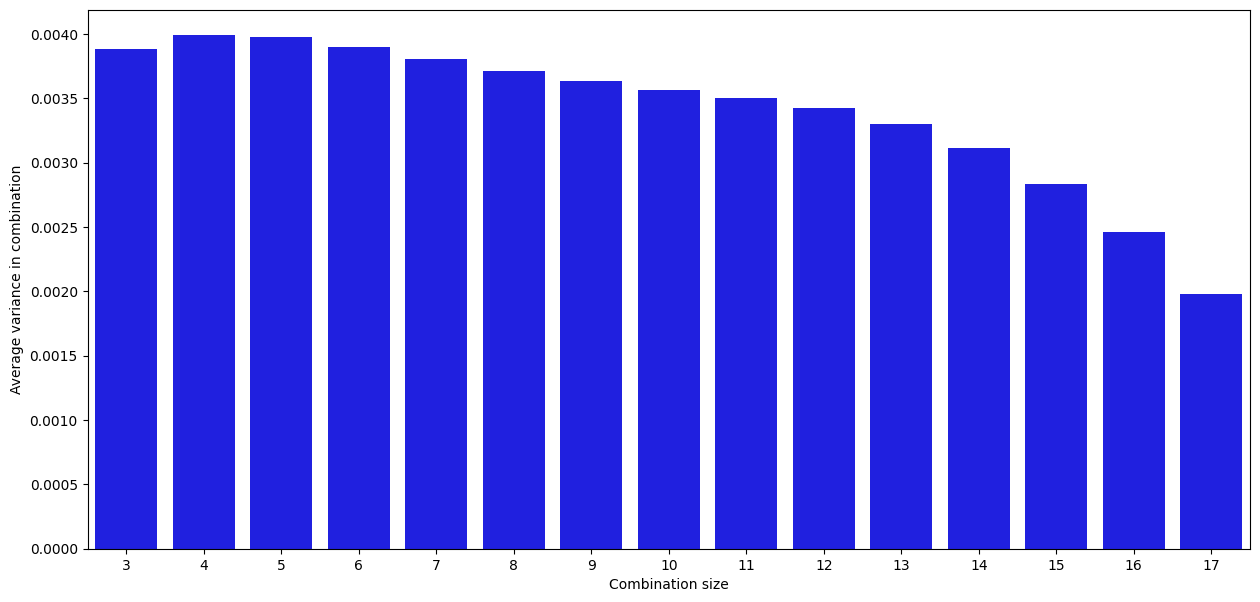

In [36]:
df_info_agg = df_info.groupby('c').agg({'value': 'mean'}).reset_index()
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(df_info_agg, x="c", y='value', color='blue')
ax.set_xlabel("Combination size")
ax.set_ylabel("Average variance in combination")

Best sensors: (1, 6, 7, 8, 9, 10, 11, 12, 16) 0.274
Worst sensors: (0, 4, 11, 12, 13, 15, 17, 18, 19) 0.057


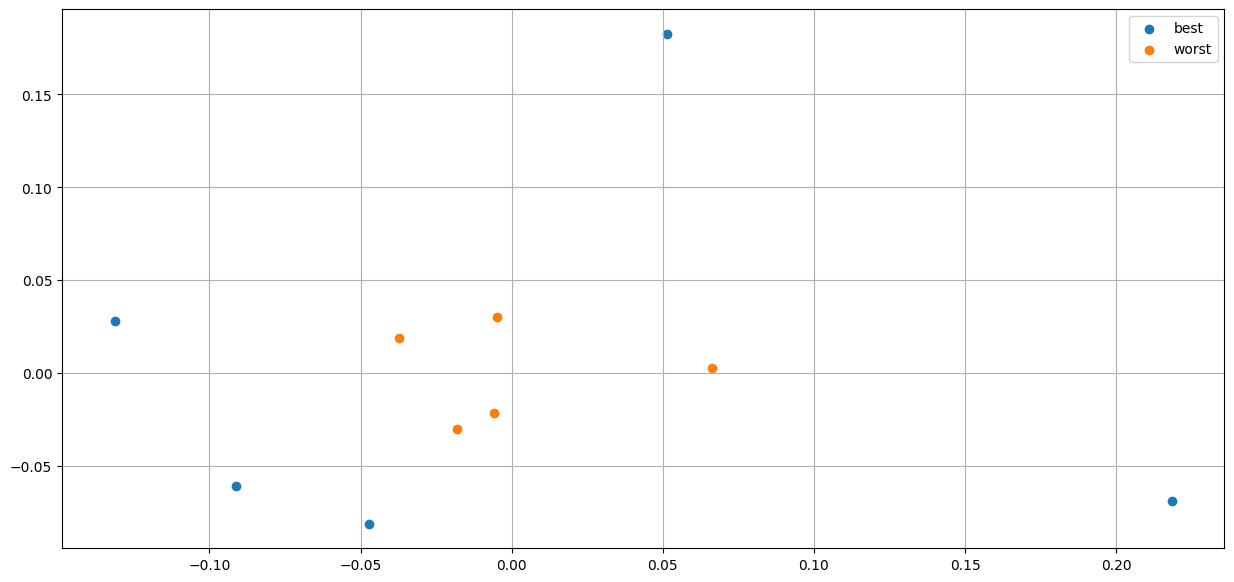

In [76]:
fig, ax = plt.subplots(figsize=(15, 7))
df = df_result[df_result["count"] == 9]


best = df.loc[df["median"].idxmax()]
tr, y = pca_transform(df_data_T, list(best.sensors))
ax.scatter(tr[:,0], tr[:,1], label="best")
best_data = pd.DataFrame([tr[:,0], tr[:,1]]).T
best_data.columns = ['x', 'y']

worst = df.loc[df["median"].idxmin()]
tr, y = pca_transform(df_data_T, list(worst.sensors))
ax.scatter(tr[:,0], tr[:,1], label="worst")
worst_data = pd.DataFrame([tr[:,0], tr[:,1]]).T
worst_data.columns = ['x', 'y']

ax.legend()
ax.grid()
# ax.set_title("Best & worst case for 9 materials combination")

print("Best sensors:", best.sensors, round(best["median"], 3))
print("Worst sensors:", worst.sensors, round(worst["median"], 3))

In [78]:
df_data.iloc[list(best.sensors)]

material_no              Materials   Acetone   Benzene  Methanol   
1             1          NiO #1-100k-p  0.198216  0.067103  0.217657  \
6             6        NiO #5-1M-N/B-p  0.200369  0.022174  0.278004   
7             7  NiCo2O4 #1-1M-N-p-D/B  0.155551  0.000000  0.034960   
8             8  V2O5-50% WO₃-1M-N/B-n  0.104182  0.103516  0.124410   
9             9         5.0 AZO-1M-N-n  0.172129  0.083895  0.019027   
10           10           2.5 AZO-1M-n  0.302609  0.223357  0.090051   
11           11            V2O5-100k-n  0.016662  0.053179  0.007171   
12           12     V2O5-10% WO3-10k-n  0.026027  0.043325  0.001676   
16           16          ITO #4.3-1M-n  0.168714  0.060004  0.216719   

     Ethanol       IPA  
1   0.122994  0.075274  
6   0.154506  0.226892  
7   0.160835  0.216128  
8   0.087419  0.055327  
9   0.013847  0.041146  
10  0.088518  0.096605  
11  0.011163  0.005334  
12  0.002589  0.001934  
16  0.131874  0.133911

Best sensors: (1, 6, 7, 8, 9, 10, 11, 12, 16) 0.274
Worst sensors: (0, 4, 11, 12, 13, 15, 17, 18, 19) 0.057


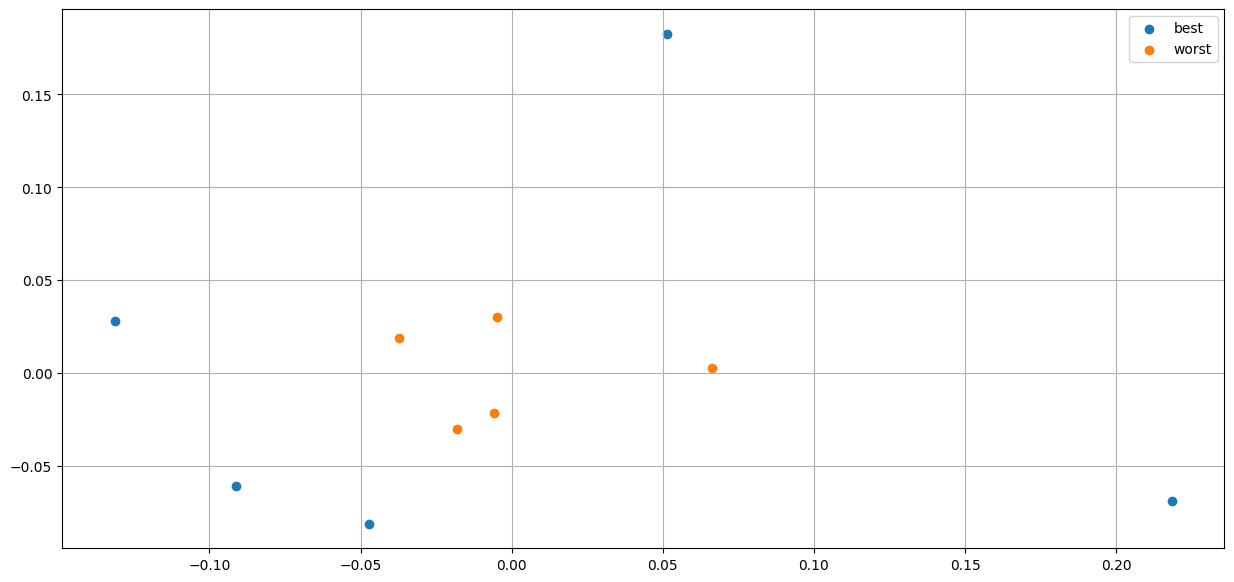

In [79]:
# Check the best combination

fig, ax = plt.subplots(figsize=(15, 7))
df = df_result[df_result["count"] == 9]


best = df.loc[df["median"].idxmax()]
tr, y = pca_transform(df_data_T, list(best.sensors))
ax.scatter(tr[:,0], tr[:,1], label="best")
best_data = pd.DataFrame([tr[:,0], tr[:,1]]).T
best_data.columns = ['x', 'y']

worst = df.loc[df["median"].idxmin()]
tr, y = pca_transform(df_data_T, list(worst.sensors))
ax.scatter(tr[:,0], tr[:,1], label="worst")
worst_data = pd.DataFrame([tr[:,0], tr[:,1]]).T
worst_data.columns = ['x', 'y']

ax.legend()
ax.grid()
# ax.set_title("Best & worst case for 9 materials combination")

print("Best sensors:", best.sensors, round(best["median"], 3))
print("Worst sensors:", worst.sensors, round(worst["median"], 3))

In [45]:
df_data.iloc[list(best.sensors)]

material_no              Materials   Acetone   Benzene  Methanol   
1             1          NiO #1-100k-p  0.198216  0.067103  0.217657  \
6             6        NiO #5-1M-N/B-p  0.200369  0.022174  0.278004   
7             7  NiCo2O4 #1-1M-N-p-D/B  0.155551  0.000000  0.034960   
8             8  V2O5-50% WO₃-1M-N/B-n  0.104182  0.103516  0.124410   
9             9         5.0 AZO-1M-N-n  0.172129  0.083895  0.019027   
10           10           2.5 AZO-1M-n  0.302609  0.223357  0.090051   
11           11            V2O5-100k-n  0.016662  0.053179  0.007171   
12           12     V2O5-10% WO3-10k-n  0.026027  0.043325  0.001676   
16           16          ITO #4.3-1M-n  0.168714  0.060004  0.216719   

     Ethanol       IPA  
1   0.122994  0.075274  
6   0.154506  0.226892  
7   0.160835  0.216128  
8   0.087419  0.055327  
9   0.013847  0.041146  
10  0.088518  0.096605  
11  0.011163  0.005334  
12  0.002589  0.001934  
16  0.131874  0.133911

In [46]:
df_data['Materials'][list(best.sensors)]

1             NiO #1-100k-p
6           NiO #5-1M-N/B-p
7     NiCo2O4 #1-1M-N-p-D/B
8     V2O5-50% WO₃-1M-N/B-n
9            5.0 AZO-1M-N-n
10             2.5 AZO-1M-n
11              V2O5-100k-n
12       V2O5-10% WO3-10k-n
16            ITO #4.3-1M-n
Name: Materials, dtype: object

In [47]:
df_data['Materials'][list(worst.sensors)]

0             CoOx-100k-p
4     NiO #4-100k-N/B/I-p
11            V2O5-100k-n
12     V2O5-10% WO3-10k-n
13      V2O5-5% WO3-10k-n
15            AZO #7-1M-n
17          AZO #6-1M-N-n
18        GZO #2.1-1M-N-n
19            AZO #1-1M-n
Name: Materials, dtype: object

# One analyte vs. others

In [48]:
ANALYTES

['Acetone', 'Benzene', 'Methanol', 'Ethanol', 'IPA']

In [49]:
analytes_result = {a: [] for a in ANALYTES}

In [50]:
min_sensors = 9
max_sensors = 9

for analyte in tqdm(ANALYTES, desc="Analyte"):
    for count in tqdm(range(min_sensors, max_sensors + 1), leave=False):
        for sensors in tqdm(combinations(MATERIALS, count), leave=False):
            tr, y = pca_transform(df_data_T, list(sensors))
            info = pca_estimate(tr, y, only=analyte)
            analytes_result[analyte].append({
                "sensors": sensors,
                **info,
            })

Analyte:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [141]:
df_acetone = pd.DataFrame(analytes_result["Acetone"])
df_acetone["count"] = df_acetone.sensors.apply(len)
df_benzene = pd.DataFrame(analytes_result["Benzene"])
df_benzene["count"] = df_benzene.sensors.apply(len)
df_methanol = pd.DataFrame(analytes_result["Methanol"])
df_methanol["count"] = df_methanol.sensors.apply(len)
df_ethanol = pd.DataFrame(analytes_result["Ethanol"])
df_ethanol["count"] = df_ethanol.sensors.apply(len)
df_ipa = pd.DataFrame(analytes_result["IPA"])
df_ipa["count"] = df_ipa.sensors.apply(len)

In [142]:
df_acetone.head()

sensors    median      mean  count
0   (0, 1, 2, 3, 4, 5, 6, 7, 8)  0.160469  0.176513      9
1   (0, 1, 2, 3, 4, 5, 6, 7, 9)  0.156120  0.174078      9
2  (0, 1, 2, 3, 4, 5, 6, 7, 10)  0.194250  0.196837      9
3  (0, 1, 2, 3, 4, 5, 6, 7, 11)  0.156745  0.174727      9
4  (0, 1, 2, 3, 4, 5, 6, 7, 12)  0.156789  0.174002      9

In [143]:
single_analyte_info = {
    k: {
        "best_sensors": [],
        "best_median": [],
        "worst_sensors": [],
        "worst_median": [],
    } for k in ANALYTES
}

In [144]:
ANALYTES

['Acetone', 'Benzene', 'Methanol', 'Ethanol', 'IPA']

In [145]:
# Just to make a table for single_analyte_info
for analyte in ANALYTES:
    df = pd.DataFrame(analytes_result[analyte])
    df["count"] = df.sensors.apply(len)
    df = df[df["count"] == 9]  # Fix 9 to be sync with multiclass classification

    best = df.loc[df["median"].idxmax()]
    worst = df.loc[df["median"].idxmin()]

    print("Best sensors:", best.sensors, best["median"], len(best.sensors))
    print("Worst sensors:", worst.sensors, worst["median"], len(worst.sensors))

    # Fill agg info report
    single_analyte_info[analyte]["best_sensors"] = list(best.sensors)
    single_analyte_info[analyte]["best_median"] = best["median"]
    single_analyte_info[analyte]["worst_sensors"] = list(worst.sensors)
    single_analyte_info[analyte]["worst_median"] = worst["median"]

Best sensors: (1, 4, 5, 7, 8, 9, 10, 12, 15) 0.2916946614785936 9
Worst sensors: (0, 3, 4, 11, 13, 15, 17, 18, 19) 0.04011434116585588 9
Best sensors: (2, 6, 7, 9, 10, 11, 14, 15, 16) 0.3165748531388196 9
Worst sensors: (0, 2, 3, 4, 8, 13, 17, 18, 19) 0.06513301737911047 9
Best sensors: (1, 2, 4, 5, 6, 7, 8, 14, 16) 0.2892130844995979 9
Worst sensors: (0, 3, 11, 12, 13, 15, 17, 18, 19) 0.03678583471017974 9
Best sensors: (1, 2, 4, 5, 6, 7, 9, 10, 16) 0.23921894525830728 9
Worst sensors: (0, 3, 11, 12, 13, 15, 17, 18, 19) 0.04153265531450558 9
Best sensors: (1, 2, 4, 5, 6, 7, 8, 10, 16) 0.28954428457534553 9
Worst sensors: (0, 3, 11, 12, 13, 15, 17, 18, 19) 0.03805902866788568 9


In [146]:
single_analyte_info

{'Acetone': {'best_sensors': [1, 4, 5, 7, 8, 9, 10, 12, 15],
  'best_median': 0.2916946614785936,
  'worst_sensors': [0, 3, 4, 11, 13, 15, 17, 18, 19],
  'worst_median': 0.04011434116585588},
 'Benzene': {'best_sensors': [2, 6, 7, 9, 10, 11, 14, 15, 16],
  'best_median': 0.3165748531388196,
  'worst_sensors': [0, 2, 3, 4, 8, 13, 17, 18, 19],
  'worst_median': 0.06513301737911047},
 'Methanol': {'best_sensors': [1, 2, 4, 5, 6, 7, 8, 14, 16],
  'best_median': 0.2892130844995979,
  'worst_sensors': [0, 3, 11, 12, 13, 15, 17, 18, 19],
  'worst_median': 0.03678583471017974},
 'Ethanol': {'best_sensors': [1, 2, 4, 5, 6, 7, 9, 10, 16],
  'best_median': 0.23921894525830728,
  'worst_sensors': [0, 3, 11, 12, 13, 15, 17, 18, 19],
  'worst_median': 0.04153265531450558},
 'IPA': {'best_sensors': [1, 2, 4, 5, 6, 7, 8, 10, 16],
  'best_median': 0.28954428457534553,
  'worst_sensors': [0, 3, 11, 12, 13, 15, 17, 18, 19],
  'worst_median': 0.03805902866788568}}

In [147]:
for a, info in single_analyte_info.items():
    print()
    print(a)
    print("best:")
    print("    ", "median:", round(info["best_median"], 2)) 
    print("    ", "sensors:", info["best_sensors"])
    print("worst:")
    print("    ", "median:", round(info["worst_median"], 2))
    print("    ", "sensors:", info["worst_sensors"])


Acetone
best:
     median: 0.29
     sensors: [1, 4, 5, 7, 8, 9, 10, 12, 15]
worst:
     median: 0.04
     sensors: [0, 3, 4, 11, 13, 15, 17, 18, 19]

Benzene
best:
     median: 0.32
     sensors: [2, 6, 7, 9, 10, 11, 14, 15, 16]
worst:
     median: 0.07
     sensors: [0, 2, 3, 4, 8, 13, 17, 18, 19]

Methanol
best:
     median: 0.29
     sensors: [1, 2, 4, 5, 6, 7, 8, 14, 16]
worst:
     median: 0.04
     sensors: [0, 3, 11, 12, 13, 15, 17, 18, 19]

Ethanol
best:
     median: 0.24
     sensors: [1, 2, 4, 5, 6, 7, 9, 10, 16]
worst:
     median: 0.04
     sensors: [0, 3, 11, 12, 13, 15, 17, 18, 19]

IPA
best:
     median: 0.29
     sensors: [1, 2, 4, 5, 6, 7, 8, 10, 16]
worst:
     median: 0.04
     sensors: [0, 3, 11, 12, 13, 15, 17, 18, 19]


In [148]:
df_data['Materials'][single_analyte_info['Benzene']['worst_sensors']]

0               CoOx-100k-p
2             NiO #2-100k-p
3             NiO #3-100k-p
4       NiO #4-100k-N/B/I-p
8     V2O5-50% WO₃-1M-N/B-n
13        V2O5-5% WO3-10k-n
17            AZO #6-1M-N-n
18          GZO #2.1-1M-N-n
19              AZO #1-1M-n
Name: Materials, dtype: object

In [149]:
single_analyte_info['Acetone']['worst_median']

0.04011434116585588

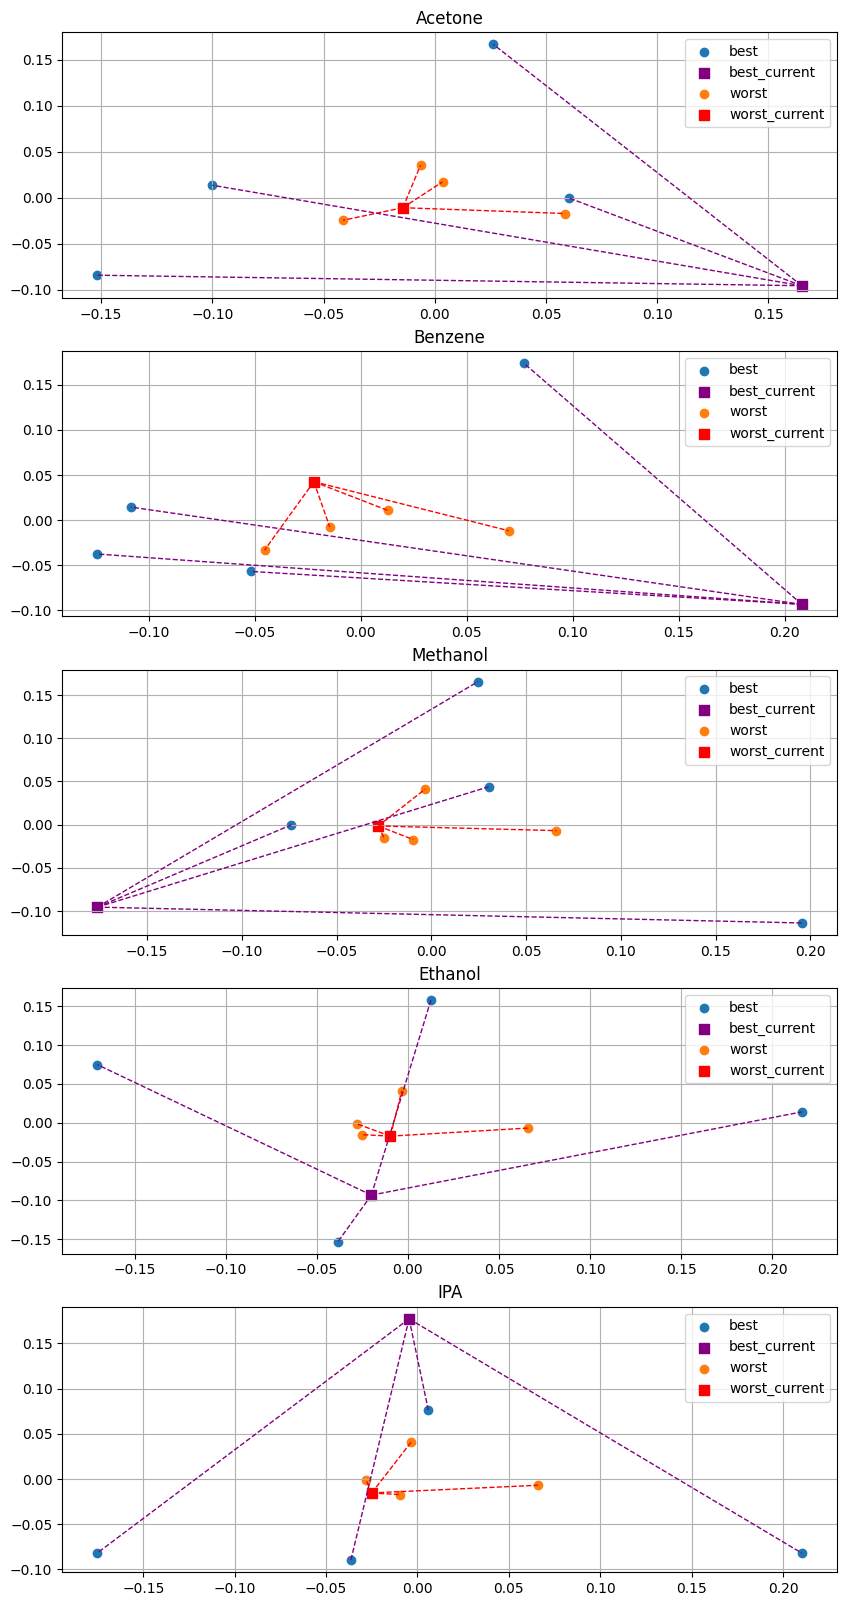

In [138]:
fig, axes = plt.subplots(figsize=(10, 20), nrows=5)

for ax, df, analyte in zip(axes, [df_acetone, df_benzene, df_methanol, df_ethanol, df_ipa], ANALYTES):
    df = df[df["count"] == 9]  # Fix 9 to be sync with multiclass classification
    
    best = df.loc[df["median"].idxmax()]
    tr, y = pca_transform(df_data_T, list(best.sensors))
    curr = y[y == analyte].index[0]
    ax.scatter(tr[:,0], tr[:,1], label="best")
    ax.scatter(tr[curr, 0], tr[curr, 1], color="purple", marker="s", s=50, label="best_current")    
    a = (tr[curr, 0], tr[curr, 1])
    for b in tr:
        ax.plot([a[0], b[0]], [a[1], b[1]], linestyle='--', color="purple", linewidth=1)
    
    worst = df.loc[df["median"].idxmin()]
    tr, y = pca_transform(df_data_T, list(worst.sensors))
    curr = y[y == analyte].index[0]
    ax.scatter(tr[:,0], tr[:,1], label="worst")
    ax.scatter(tr[curr,0], tr[curr,1], color="red", s=50, marker="s", label="worst_current")
    a = (tr[curr, 0], tr[curr, 1])
    for b in tr:
        ax.plot([a[0], b[0]], [a[1], b[1]], linestyle='--', color="red", linewidth=1)
    
    ax.legend()
    ax.grid()
    ax.set_title(analyte)

In [126]:
best_sensors = []
worst_sensors = []
for k, v in single_analyte_info.items():
    best_sensors.append(v['best_sensors'])
    worst_sensors.append(v['worst_sensors'])

In [127]:
from functools import reduce
res = list(reduce(lambda i, j: i & j, (set(x) for x in best_sensors)))
df_data['Materials'][res]

7    NiCo2O4 #1-1M-N-p-D/B
Name: Materials, dtype: object

In [132]:
tr, y = pca_transform(df_data_T, list([1, 4, 5, 7, 8, 9, 10, 12, 15]))
info = pca_estimate(tr, y, only=analyte)
info

{'median': 0.2916946614785936, 'mean': 0.2604870073631129}

In [133]:
tr, y = pca_transform(df_data_T, list([1, 4, 5, 8, 9, 10, 12, 15]))
info = pca_estimate(tr, y, only=analyte)
info

{'median': 0.27931493821201775, 'mean': 0.26508715835324925}

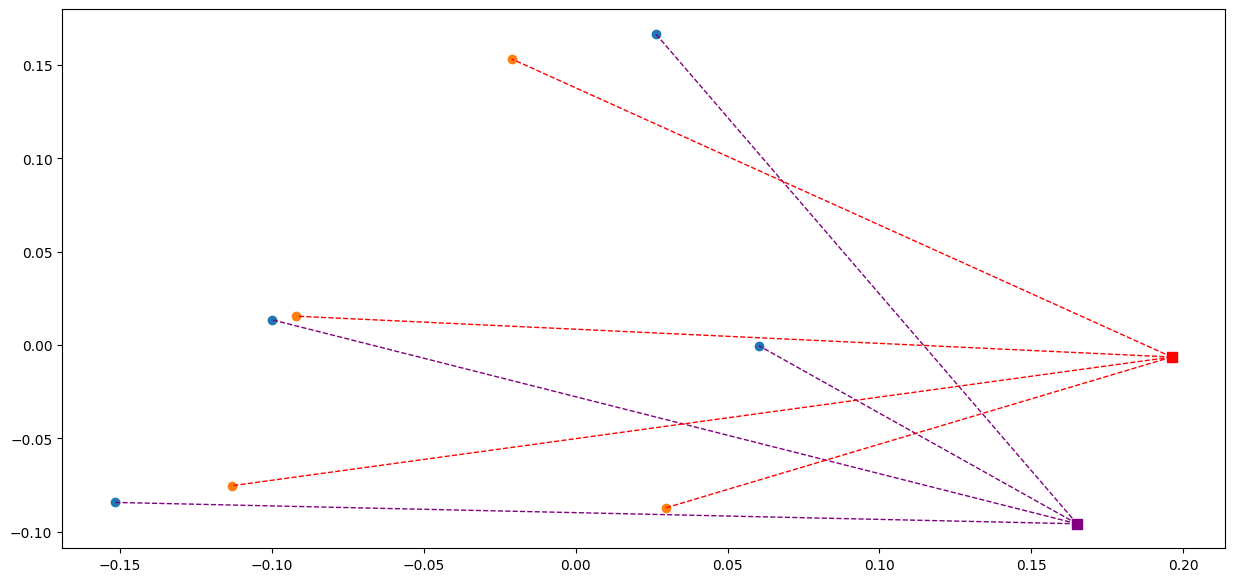

In [136]:
analyte = "Acetone"
fig, ax = plt.subplots(figsize=(15, 7))

tr, y = pca_transform(df_data_T, list([1, 4, 5, 7, 8, 9, 10, 12, 15]))
best_data = pd.DataFrame([tr[:,0], tr[:,1]]).T
best_data.columns = ['x', 'y']
curr = y[y == analyte].index[0]
ax.scatter(tr[:,0], tr[:,1], label="with common sensors")
ax.scatter(tr[curr, 0], tr[curr, 1], color="purple", marker="s", s=50, label="acetone")    
a = (tr[curr, 0], tr[curr, 1])
for b in tr:
    ax.plot([a[0], b[0]], [a[1], b[1]], linestyle='--', color="purple", linewidth=1)


tr, y = pca_transform(df_data_T, list([1, 4, 5, 8, 9, 10, 12, 15]))
best_data_2 = pd.DataFrame([tr[:,0], tr[:,1]]).T
best_data_2.columns = ['x', 'y']
curr = y[y == analyte].index[0]
ax.scatter(tr[:,0], tr[:,1], label="without common sensors")
ax.scatter(tr[curr, 0], tr[curr, 1], color="red", marker="s", s=50)    
a = (tr[curr, 0], tr[curr, 1])
for b in tr:
    ax.plot([a[0], b[0]], [a[1], b[1]], linestyle='--', color="red", linewidth=1)
